In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47215,43135.0,1.058643,-0.060172,1.158962,1.238041,-0.767915,0.050298,-0.542773,0.162318,0.463164,...,0.154448,0.430457,-0.010129,0.076326,0.252501,-0.335943,0.071414,0.044003,45.00,0
204561,135334.0,2.060554,-0.014060,-1.050770,0.414051,-0.101851,-1.206222,0.221847,-0.365863,0.460699,...,-0.282121,-0.654522,0.334274,0.060840,-0.281956,0.193526,-0.067410,-0.058573,2.58,0
7630,10558.0,0.034378,1.269255,1.623026,2.629500,-0.109719,-0.455839,0.334352,-0.157957,0.348182,...,-0.028681,0.123733,0.278804,0.629767,-1.402082,-0.338891,0.054346,0.179611,10.00,0
264915,161651.0,-0.564804,1.280038,0.113223,0.000490,0.055128,-0.832168,0.571498,0.222767,-0.381927,...,-0.167129,-0.432644,0.077900,-0.076760,-0.740019,0.309309,0.132343,0.169844,7.74,0
191590,129334.0,1.632965,-1.892832,-0.696195,-0.610746,-1.566403,-0.682925,-0.744141,-0.181504,0.163644,...,0.552474,0.999454,-0.123564,-0.067848,-0.297213,-0.087449,-0.038887,0.001696,290.00,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96186.057927,-0.033622,0.110111,-0.029712,0.036079,-0.030257,0.017570,0.042631,-0.043975,-0.003026,...,0.008838,0.021095,0.009151,-0.011681,0.001105,0.004653,0.012359,-0.005129,-0.001817,88.263567
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
47215    43135.0  1.058643 -0.060172  1.158962  1.238041 -0.767915  0.050298   
204561  135334.0  2.060554 -0.014060 -1.050770  0.414051 -0.101851 -1.206222   
7630     10558.0  0.034378  1.269255  1.623026  2.629500 -0.109719 -0.455839   
264915  161651.0 -0.564804  1.280038  0.113223  0.000490  0.055128 -0.832168   
191590  129334.0  1.632965 -1.892832 -0.696195 -0.610746 -1.566403 -0.682925   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [18]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [21]:
y_pred = model.predict(X_test)
XG_test_data_accuracy = accuracy_score(Y_test,y_pred)
XG_precision = precision_score(Y_test, y_pred)
XG_f1 = f1_score(Y_test, y_pred)
XG_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("XG Boost : ")
print("Accuracy : ",XG_test_data_accuracy)
print("Precision : ",XG_precision)
print("F1 : ",XG_f1)
print("Recall : ",XG_recall)
print(f'Classification Report:\n{classification_rep}')

XG Boost : 
Accuracy :  0.9695945945945946
Precision :  0.967032967032967
F1 :  0.9513513513513513
Recall :  0.9361702127659575
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       202
           1       0.97      0.94      0.95        94

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.96       296
weighted avg       0.97      0.97      0.97       296



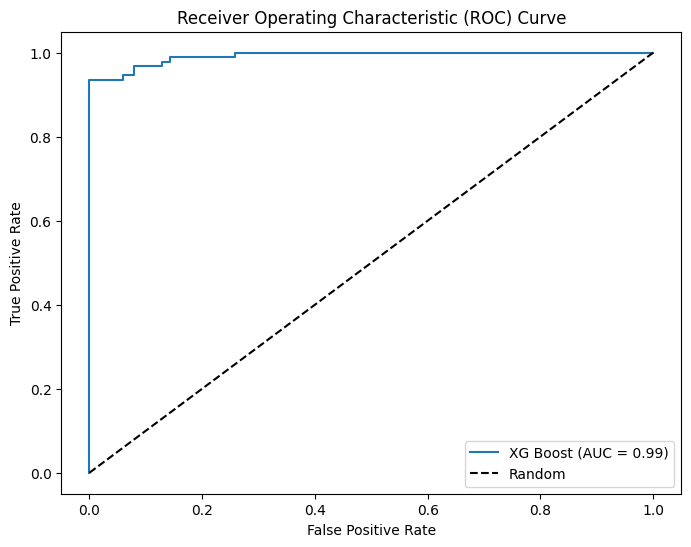

In [23]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XG Boost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()